### 01 Import the libraries

In [ ]:
from keras.models import sequential
from  keras.layers import Dense,Flatten,Activation
from  tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np               

### 02 import cifar10 dataset from keras datasets

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


### 03 change  the label data(y) to categorical type

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 04 Change input data(x) to float type and and normalize between 0 to 1

In [ ]:
x_train =  x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

### 05  define two function  to visualize the train and validation data accuracy

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [ ]:
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

In [ ]:
cc=CustomCallback()

###06 Create the model1 neural network,compile,fit the neural network to train  the dataset 

In [ ]:
case_1 = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(256,activation = "relu"),
                          keras.layers.Dense(128,activation  = "relu"),
                          keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
case_1.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
history  = case_1.fit(x_train,y_train,epochs = 25,verbose =  0,validation_data = (x_test,y_test),callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.3299799859523773
Accuracy reached val is 0.3779999911785126

 Finished epoch # 5
Accuracy resched train is 0.4662800133228302
Accuracy reached val is 0.46889999508857727

 Finished epoch # 10
Accuracy resched train is 0.49639999866485596
Accuracy reached val is 0.4645000100135803

 Finished epoch # 15
Accuracy resched train is 0.5169000029563904
Accuracy reached val is 0.48089998960494995

 Finished epoch # 20
Accuracy resched train is 0.5296400189399719
Accuracy reached val is 0.506600022315979



### 07 plot the train vs validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the model1. In model1  there is some overfitting after 10 epochs.here minimum epochs need to train model1 is about **10 epochs**

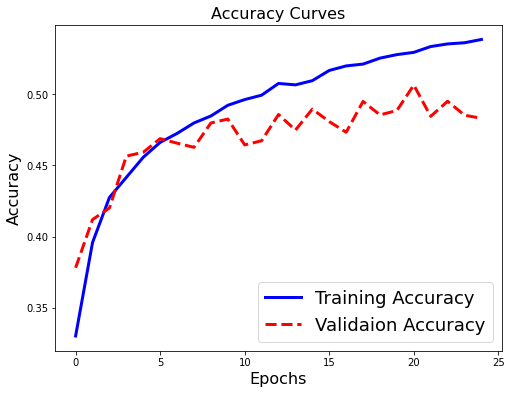

In [ ]:
result_plotting()

### 08 validation data accuracy for model1

In [ ]:
case_1.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.4620 - accuracy: 0.4832


0.4832000136375427

### 08 Create the **case_2** neural network with convolution ,layers,maxpooling layers, dropout layers and compile and fit the train data

In [ ]:
case_2 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Flatten(),
                           keras.layers.Dense(256,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(128,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
case_2.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
history = case_2.fit(x_train,y_train,epochs = 25,verbose  =   0,validation_data = (x_test,y_test),callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.4257600009441376
Accuracy reached val is 0.5565999746322632

 Finished epoch # 5
Accuracy resched train is 0.7360799908638
Accuracy reached val is 0.7084000110626221

 Finished epoch # 10
Accuracy resched train is 0.8127999901771545
Accuracy reached val is 0.7199000120162964

 Finished epoch # 15
Accuracy resched train is 0.8583199977874756
Accuracy reached val is 0.7258999943733215

 Finished epoch # 20
Accuracy resched train is 0.8871399760246277
Accuracy reached val is 0.7146999835968018



### 09 plot the train vs validation data accuracy after each epochs to find the overfitting calcutate the minimum epochs need to train the case_2.in case_2 overfitting happenning. here minimum epochs need to train model2 is about **5 epochs**  


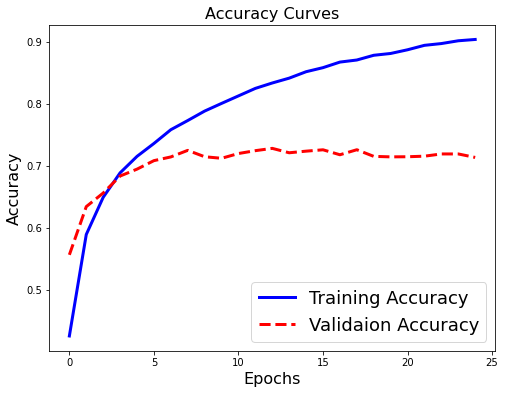

In [ ]:
result_plotting()

###  10 validation data accuracy for case_2 after 20 epochs.accuracy for validation data has increased in case_2 compare with case_1. accuracy  improved using additional layers like maxpooling,dropout,convolution layers.

In [ ]:
case_2.evaluate(x_test,y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 1.2507 - accuracy: 0.7136


0.7135999798774719

### 11 **created the case_3 which is exactly same neuralnetwork,compile parameters like case_2**.But **train the case_3 using  by  using augmented images**.

In [ ]:
case_3 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Flatten(),
                           keras.layers.Dense(256,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(128,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
])

In [ ]:
case_3.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
datagen = ImageDataGenerator(zoom_range = 0.2,horizontal_flip=True)
history = case_3.fit_generator(datagen.flow(x_train,y_train),epochs = 25,verbose =  0,validation_data = (x_test,y_test),callbacks = [cc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


 Finished epoch # 0
Accuracy resched train is 0.3936600089073181
Accuracy reached val is 0.527899980545044

 Finished epoch # 5
Accuracy resched train is 0.6680399775505066
Accuracy reached val is 0.6965000033378601

 Finished epoch # 10
Accuracy resched train is 0.7211199998855591
Accuracy reached val is 0.695900022983551

 Finished epoch # 15
Accuracy resched train is 0.747219979763031
Accuracy reached val is 0.7391999959945679

 Finished epoch # 20
Accuracy resched train is 0.7614799737930298
Accuracy reached val is 0.7588000297546387



###12 plot the train vs validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the case_3. in model3 there is **no overfitting**.by using the image data augmnetation we could prevent the overfitting in case_3

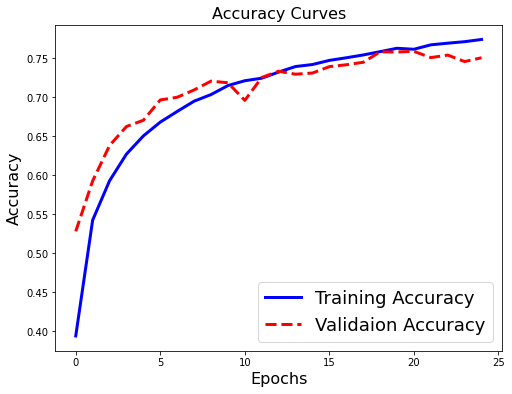

In [ ]:
result_plotting()

###  13 case_3 the validation data accuracy after 20 epochs.here accuracy for validation data has increased in case_3 compare with case_1 and case_2.By train the model3 using augmented image datasets 

In [ ]:
case_3.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 5ms/step - loss: 0.7599 - accuracy: 0.7506


0.7505999803543091

### 14 merege the train and test datasets together to split the dataset randomly  using KFold method  

In [ ]:
x_integrate = np.concatenate((x_train,x_test),axis = 0)
y_integrate = np.concatenate((y_train,y_test),axis = 0)

### 15 Here in the below case_4 I have use the same neural network like previous  models and compile parameters like case_1 and case_2, but I have train the model using shuffled train datasets using KFold.


In [ ]:
kfold = KFold(n_splits = 5,shuffle = True)
acc_list = []
cache_list = []
for train_index,test_index in kfold.split(x_integrate,y_integrate):
  case_4 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           
                           keras.layers.Flatten(),
                           keras.layers.Dense(256,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(128,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
  ])
  case_4.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
  )
  history = case_4.fit(x_integrate[train_index],y_integrate[train_index],epochs = 25,verbose =  0,validation_data = (x_test,y_test),callbacks = [cc])
  cache_list.append(history)
  acc_list.append(case_4.evaluate(x_integrate[test_index],y_integrate[test_index])[1])
np.mean(acc_list)

 Finished epoch # 0
Accuracy resched train is 0.41722917556762695
Accuracy reached val is 0.5526999831199646

 Finished epoch # 5
Accuracy resched train is 0.7400624752044678
Accuracy reached val is 0.7721999883651733

 Finished epoch # 10
Accuracy resched train is 0.820395827293396
Accuracy reached val is 0.8327999711036682

 Finished epoch # 15
Accuracy resched train is 0.8635416626930237
Accuracy reached val is 0.8737999796867371

 Finished epoch # 20
Accuracy resched train is 0.8916875123977661
Accuracy reached val is 0.8855000138282776

375/375 [==============================] - 2s 4ms/step - loss: 1.2178 - accuracy: 0.7262
 Finished epoch # 0
Accuracy resched train is 0.4261458218097687
Accuracy reached val is 0.5590000152587891

 Finished epoch # 5
Accuracy resched train is 0.7387083172798157
Accuracy reached val is 0.765999972820282

 Finished epoch # 10
Accuracy resched train is 0.8143125176429749
Accuracy reached val is 0.8087000250816345

 Finished epoch # 15
Accuracy resche

0.7200500011444092

### 16 plot the train vs validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the case_4. in case_4 there is **no overfitting**. here minimum epochs need to train case_4 is about **25 epochs**.This is achieved by shuffle the data by using KFold methode.case_4 overfittig prevent by the data shuffle by using KFold

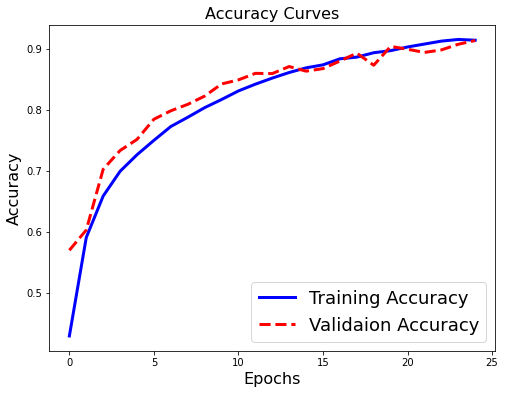

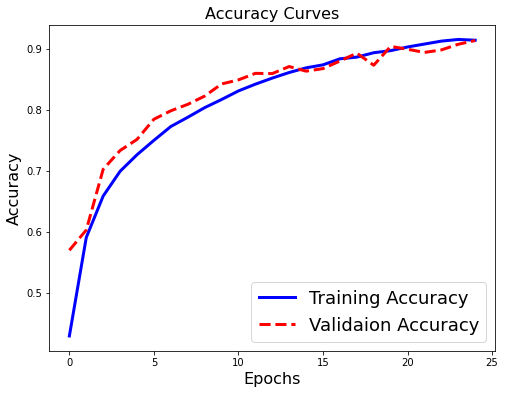

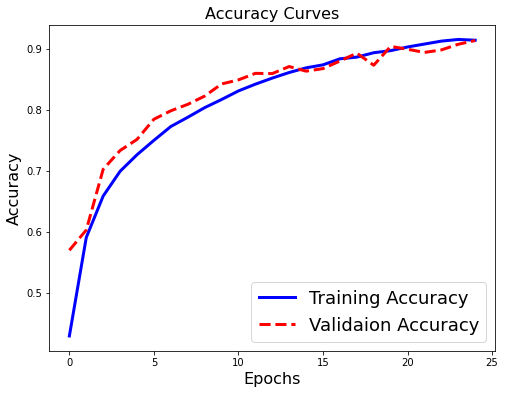

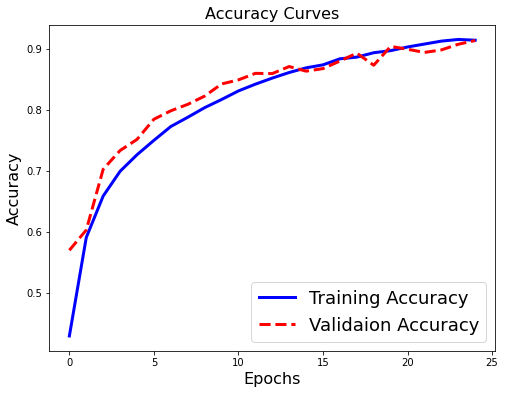

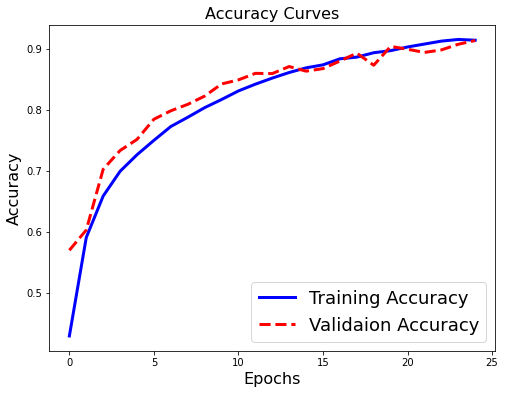

In [ ]:
for i in range(len(cache_list)):
  cache =  cache_list[i]
  result_plotting()

### Conclusion **we can prevent  the overfitting by using dropout layers and  image data augmentation**. and we can train the model for high  accuracy by using the maxpooling layers and covolution layers.  